In [1]:
from helpers.io_helper import IO_Helper
from store_error_arrs import _get_filename
from collections import defaultdict


RUN_SIZE = 'full'
ARRAYS_FOLDER = 'arrays'
MODELS_FOLDER = 'models'

BASE_MODEL_ERROR_SCORES = ['ae']
PROB_MODEL_ERROR_SCORES = ['crps', 'ae', 'ssr']

PLOT_FOR_TEST = True
PLOT_FOR_TRAIN = False

SHOW_PLOTS = True
SAVE_PLOTS = True


METHODS_WHITELIST = {
    # 'base_model_hgbr',
    # 'base_model_linreg',
    # 'base_model_nn',
    'native_qhgbr',
    'native_qr',
    'native_gp',
    'native_mvnn',
    'posthoc_cp_hgbr',
    'posthoc_cp_linreg',
    'posthoc_cp_nn',
    'posthoc_la_nn',
}


METHOD_TO_ARR_NAMES_DICT = {
    # 'base_model_hgbr': ['base_model_hgbr_n210432_it30_its3.npy'],
    # 'base_model_linreg': ['base_model_linreg_n210432.npy'],
    # 'base_model_nn': ['base_model_nn_n210432_it400_nh2_hs50.npy'],
    'native_qhgbr': [
        'native_qhgbr_y_pred_n210432_it0.npy',
        'native_qhgbr_y_quantiles_n210432_it0.npy',
        'native_qhgbr_y_std_n210432_it0.npy',
    ],
    'native_qr': [
        'native_quantile_regression_nn_y_pred_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_quantiles_n210432_it300_nh2_hs50.npy',
        'native_quantile_regression_nn_y_std_n210432_it300_nh2_hs50.npy',
    ],
    'native_gp': [
        'native_gpytorch_y_pred_n210432_it200_new.npy',
        'native_gpytorch_y_quantiles_n210432_it200_new.npy',
        'native_gpytorch_y_std_n210432_it200_new.npy',
    ],
    'native_mvnn': [
        'native_mvnn_y_pred_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_quantiles_n210432_it100_nh2_hs50.npy',
        'native_mvnn_y_std_n210432_it100_nh2_hs50.npy',
    ],
    'posthoc_cp_hgbr': [
        'posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_hgbr_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_linreg': [
        'posthoc_conformal_prediction_base_model_linreg_y_pred_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_quantiles_n210432_it5.npy',
        'posthoc_conformal_prediction_base_model_linreg_y_std_n210432_it5.npy',
    ],
    'posthoc_cp_nn': [
        'posthoc_conformal_prediction_base_model_nn_y_pred_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_quantiles_n210432_it5_cp2.npy',
        'posthoc_conformal_prediction_base_model_nn_y_std_n210432_it5_cp2.npy',
    ],
    'posthoc_la_nn': [
        'posthoc_laplace_approximation_base_model_nn_y_pred_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_quantiles_n210432_it1000_la2.npy',
        'posthoc_laplace_approximation_base_model_nn_y_std_n210432_it1000_la2.npy',
    ],
}


def split_pred_arrs_train_test(arrs, n_samples_train):
    arrs_train = list(map(lambda arr: arr[:n_samples_train], arrs))
    arrs_test = list(map(lambda arr: arr[n_samples_train:], arrs))
    return arrs_train, arrs_test


print('loading error arrays')

io_helper = IO_Helper(arrays_folder=ARRAYS_FOLDER, models_folder=MODELS_FOLDER)

# assume test for simplicity
# dataset_to_plot_for = []
# if PLOT_FOR_TRAIN:
#     dataset_to_plot_for.append('training')
# if PLOT_FOR_TEST:
#     dataset_to_plot_for.append('test')

error_arrs = defaultdict(dict)
for uq_method in METHODS_WHITELIST:
    print(f'loading for {uq_method=}')
    error_scores = BASE_MODEL_ERROR_SCORES if uq_method.startswith('base_model') else PROB_MODEL_ERROR_SCORES
    dataset = 'test'
    for error_score in error_scores:
        filename = _get_filename(infix=error_score, uq_method=uq_method, dataset=dataset,
                                 method_to_arr_names_dict=METHOD_TO_ARR_NAMES_DICT)
        error_arr_filename = f'{filename}.npy'
        try:
            error_arr = io_helper.load_array(filename=error_arr_filename)
        except FileNotFoundError as e:
            print(f'error score array {e.filename} not found, skipping')
            continue
        error_arrs[error_score][uq_method] = error_arr
print('done')

INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_linreg_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_gpytorch_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_qhgbr_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_qhgbr_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_qhgbr_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_quantile_regression_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native

loading error arrays
loading for uq_method='posthoc_cp_linreg'
loading for uq_method='native_gp'
loading for uq_method='native_qhgbr'
loading for uq_method='native_qr'
loading for uq_method='posthoc_cp_hgbr'
loading for uq_method='posthoc_cp_nn'


INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_conformal_prediction_base_model_nn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\native_mvnn_ssr_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_crps_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_ae_test.npy
INFO:root:loading array from comparison_storage\arrays\posthoc_laplace_approximation_base_model_nn_ssr_test.npy


loading for uq_method='native_mvnn'
loading for uq_method='posthoc_la_nn'
done


In [10]:
# method_pairs = {
#     ['native_mvnn', 'posthoc_cp_nn'],
#     ['native_mvnn', 'posthoc_la_nn'],
#     ['native_qhgbr', 'posthoc_cp_hgbr'],
#     ['native_qr', 'posthoc_cp_linreg'],
#     ['native_gp', None],
# }

TYPE_TO_METHOD_PAIRS = {
    'Baseline: QR vs. CP_LinReg': ['native_qr', 'posthoc_cp_linreg'],
    'Tree: QHGBR vs. CP_HGBR': ['native_qhgbr', 'posthoc_cp_hgbr'],
    'NN: MVNN vs. CP': ['native_mvnn', 'posthoc_cp_nn'],
    'NN: MVNN vs. LA': ['native_mvnn', 'posthoc_la_nn'],
    'GP': ['native_gp', None],
}

error_arrs_pairwise = {
    error_score: {
        method_type: (error_arrs_dict[method_nat],
                      error_arrs_dict[method_post] if method_post is not None else None)
        for method_type, (method_nat, method_post) in TYPE_TO_METHOD_PAIRS.items()
    }
    for error_score, error_arrs_dict in error_arrs.items()
}
error_arrs_pairwise

{'crps': {'Baseline: QR vs. CP_LinReg': (array([ 41.870596  ,  88.28804407,  53.42155324, ...,  54.26170519,
           81.11899351, 102.20362927]),
   array([ 67.42292293,  59.22690249,  65.01441428, ..., 129.89395898,
          121.51412182, 116.90738039])),
  'Tree: QHGBR vs. CP_HGBR': (array([31.65117053, 59.11122658, 30.38690361, ..., 83.11393964,
          62.22974796, 85.49551234]),
   array([ 31.3059425 ,  62.20075252,  30.68117284, ..., 104.1358645 ,
           98.12966672, 135.93517014])),
  'NN: MVNN vs. CP': (array([110.32114311, 214.68030796, 188.83509033, ...,  39.68913682,
           34.12210628,  34.53739446]),
   array([ 37.96728346,  47.33813185,  37.72314794, ...,  59.6114589 ,
           86.71892814, 110.63871703])),
  'NN: MVNN vs. LA': (array([110.32114311, 214.68030796, 188.83509033, ...,  39.68913682,
           34.12210628,  34.53739446]),
   array([ 43.45456689,  51.3891017 ,  43.23881027, ...,  61.92612969,
           85.82925731, 107.55121937])),
  'GP': (ar

Baseline: QR vs. CP_LinReg
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
Tree: QHGBR vs. CP_HGBR
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
NN: MVNN vs. CP
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
NN: MVNN vs. LA
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...
GP
plotting histogram for error_score='crps'...
plotting histogram for error_score='ae'...
plotting histogram for error_score='ssr'...


INFO:root:saving plot to comparison_storage\plots\hist_plot.png


saving plot
showing


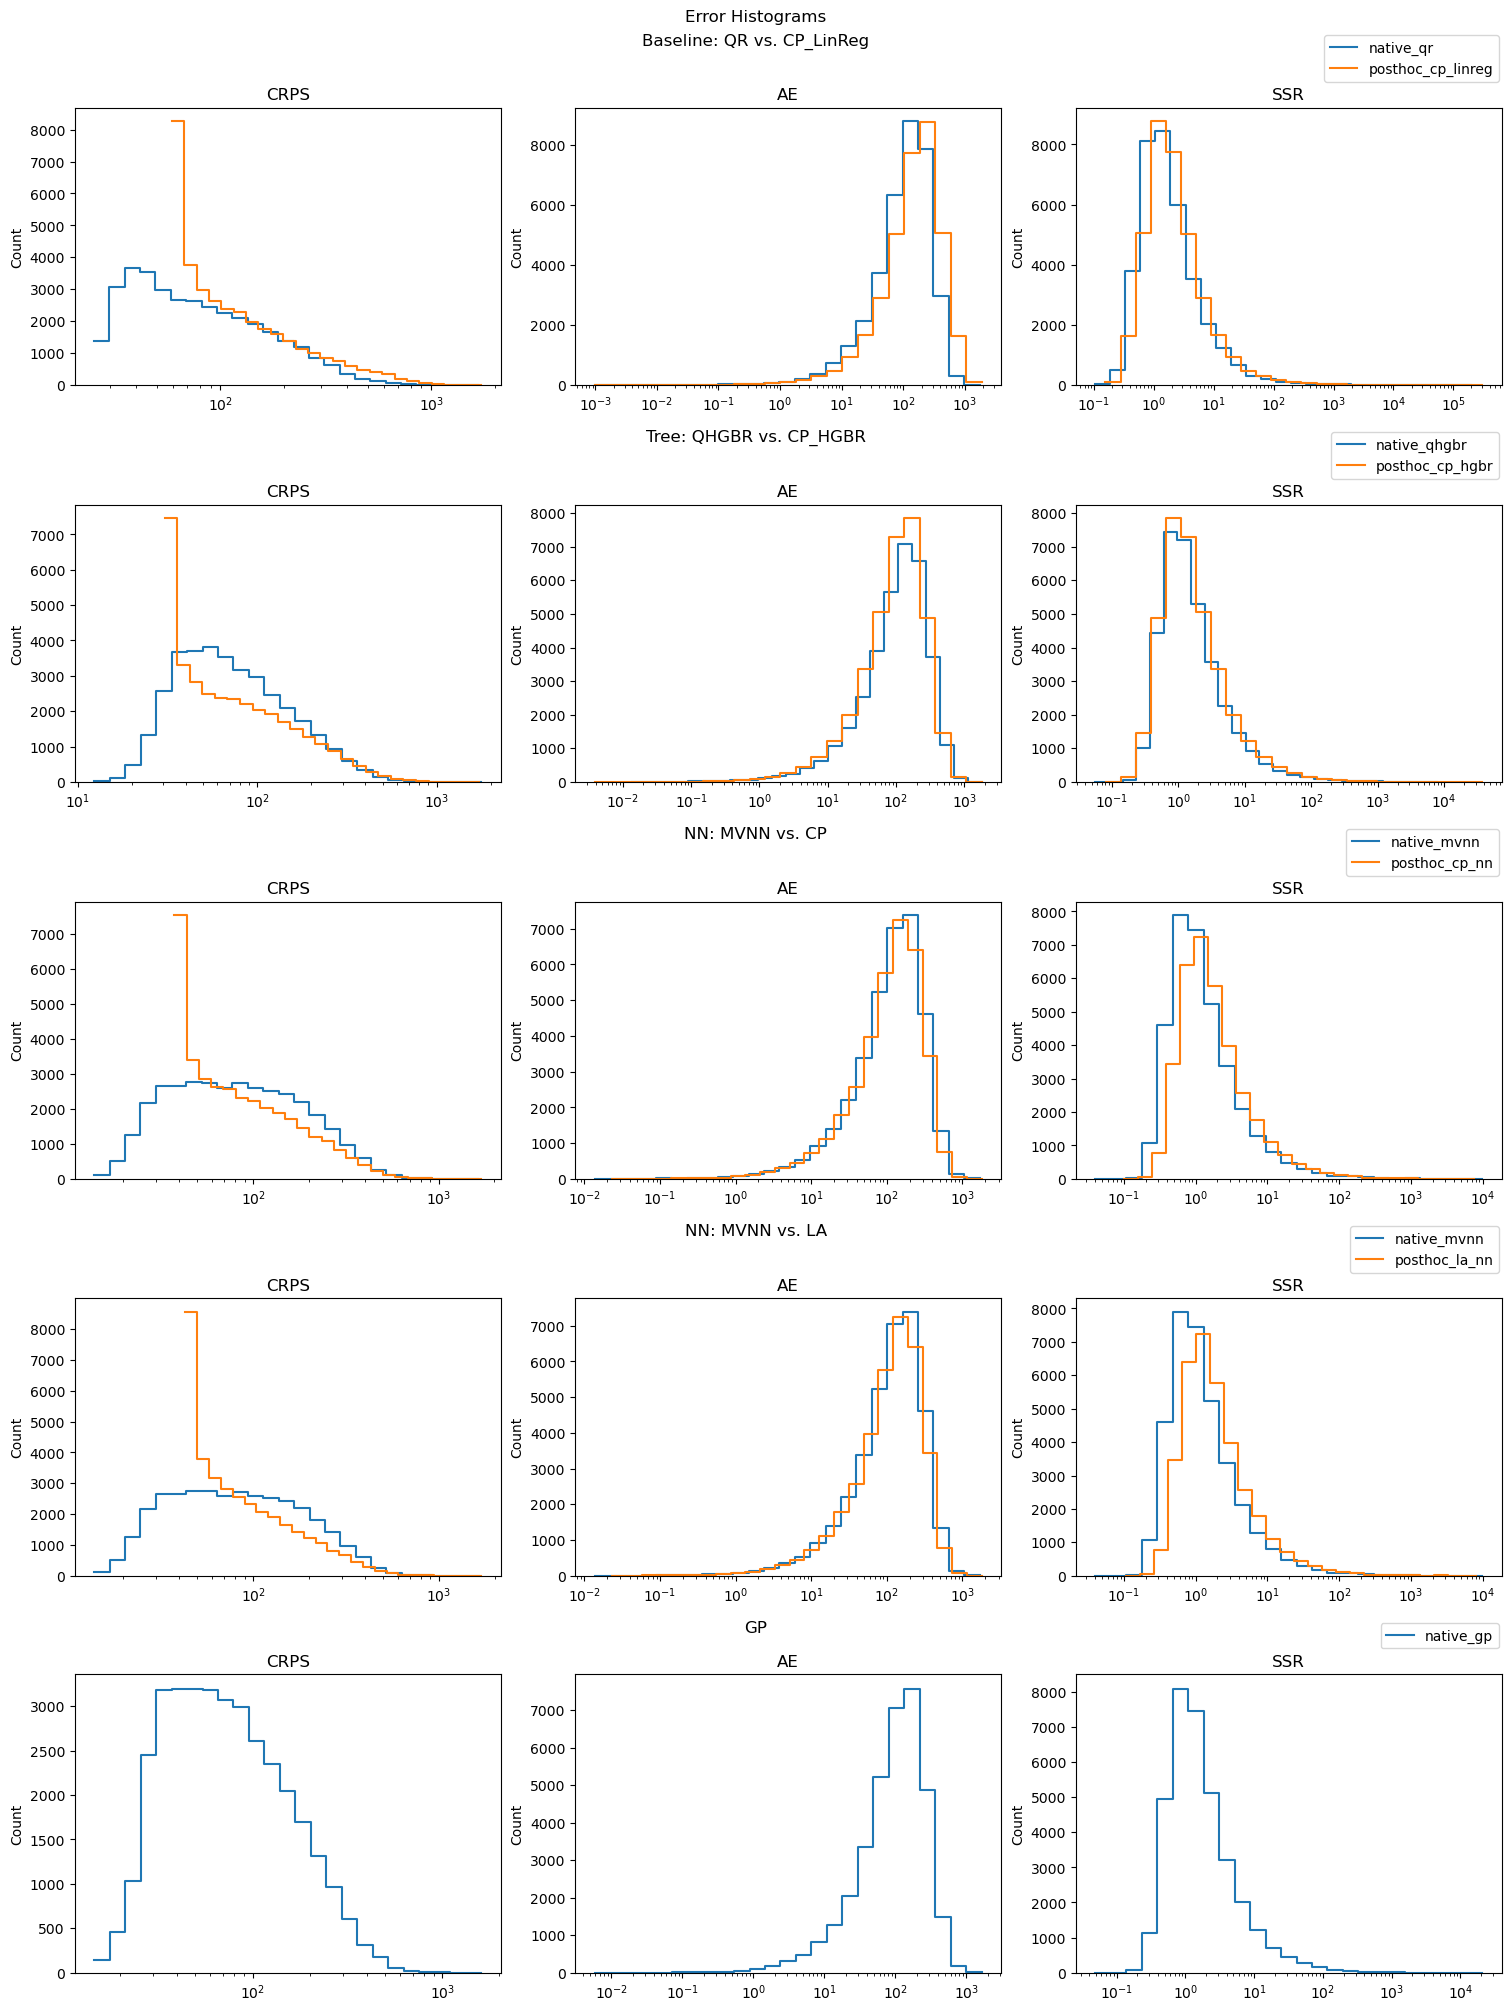

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt


DPI = 100
FILENAME = f'hist_plot.png'


def plot_hist(arr, ax=None):
    sns.histplot(arr, bins=25, log_scale=True, element="step", fill=False, ax=ax)


fig = plt.figure(figsize=(15, 20), layout='constrained', dpi=DPI)
fig.suptitle('Error Histograms')
subfigs = fig.subfigures(nrows=len(TYPE_TO_METHOD_PAIRS), ncols=1)
for subfig, method_type in zip(subfigs, TYPE_TO_METHOD_PAIRS.keys()):
    print(method_type)
    subfig.suptitle(method_type)
    
    axs = subfig.subplots(nrows=1, ncols=len(error_arrs))
    for ax, (error_score, error_arr_dict) in zip(axs, error_arrs_pairwise.items()):
        print(f'plotting histogram for {error_score=}...')
        error_arr_nat, error_arr_post = error_arr_dict[method_type]
        plot_hist(error_arr_nat, ax=ax)
        if error_arr_post is not None:
            plot_hist(error_arr_post, ax=ax)
        ax.set_title(error_score.upper())
    legend_labels = TYPE_TO_METHOD_PAIRS[method_type]
    if legend_labels[1] is None:
        legend_labels = legend_labels[:1]
    subfig.legend(legend_labels, loc='outside upper right')

if FILENAME is not None:
    print('saving plot')
    io_helper.save_plot(filename=FILENAME)
print('showing')
plt.show()

Baseline: QR vs. CP_LinReg
plotting histogram for error_score='crps'...


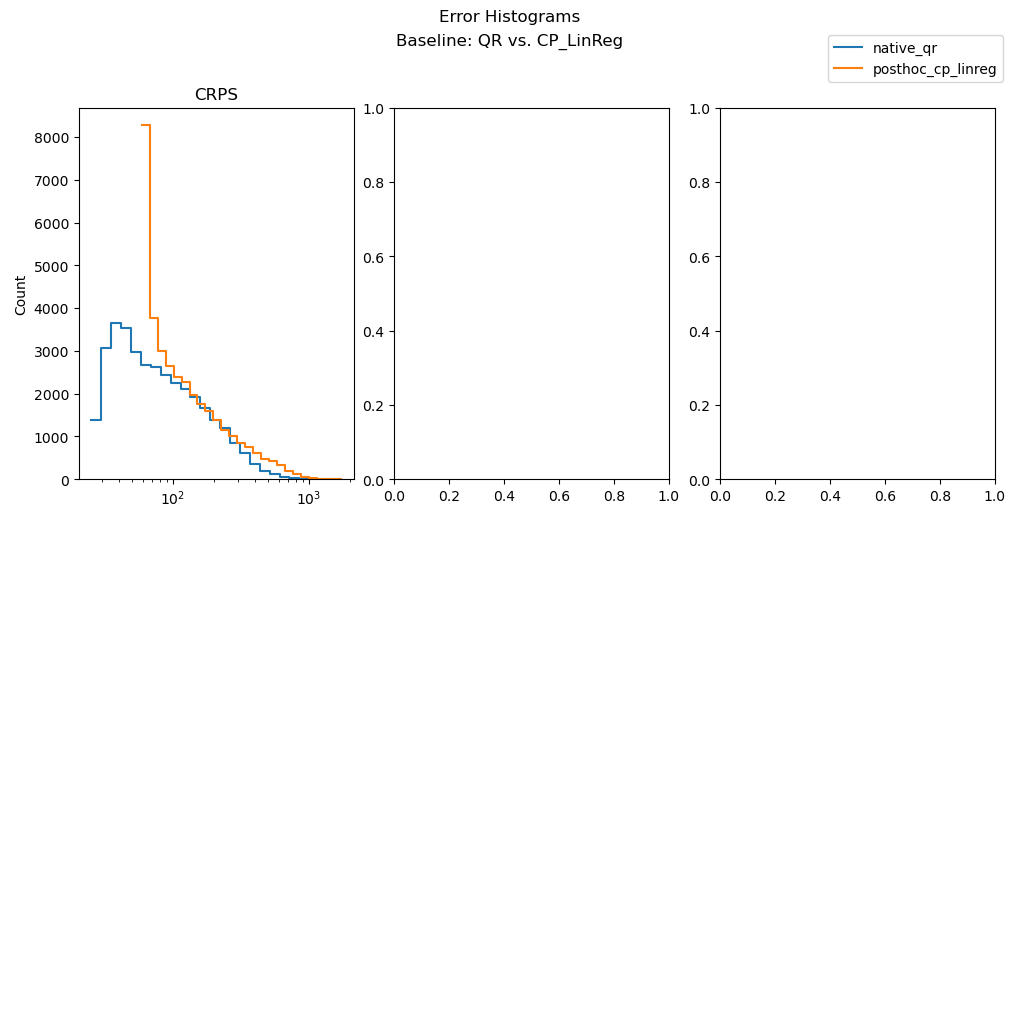

In [19]:
qr_error_arr, lr_error_arr = error_arrs_pairwise['crps']['Baseline: QR vs. CP_LinReg']

# fig, ax = plt.subplots()
# ax.set_xlim(20, 2000)
# plot_hist(qr_error_arr, ax=ax)


fig = plt.figure(figsize=(10, 10), layout='constrained', dpi=DPI)
fig.suptitle('Error Histograms')
subfigs = fig.subfigures(nrows=2, ncols=1)
for subfig, method_type in zip(subfigs, TYPE_TO_METHOD_PAIRS.keys()):
    print(method_type)
    subfig.suptitle(method_type)
    
    axs = subfig.subplots(nrows=1, ncols=len(error_arrs))
    for ax, (error_score, error_arr_dict) in zip(axs, error_arrs_pairwise.items()):
        print(f'plotting histogram for {error_score=}...')
        error_arr_nat, error_arr_post = error_arr_dict[method_type]
        plot_hist(error_arr_nat, ax=ax)
        if error_arr_post is not None:
            plot_hist(error_arr_post, ax=ax)
        ax.set_title(error_score.upper())
        break
    legend_labels = TYPE_TO_METHOD_PAIRS[method_type]
    if legend_labels[1] is None:
        legend_labels = legend_labels[:1]
    subfig.legend(legend_labels, loc='outside upper right')
    break